In [1]:
# importing the requests library 
import requests 
import pandas as pd
from random import sample 
import matplotlib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys
import scipy
import matplotlib as mpl
import math

In [2]:
df_genes = pd.read_csv("cleaned_gene_list.csv")
df_genes = df_genes.applymap(str)
df_genes["gene number"] = df_genes["gene number"].apply(pd.to_numeric)
df_genes.head()

,gene ID,pham,function,translation,orientation,phage,gene number,uncleaned function
0,20ES_CDS_1,36676,NKF,M,F,20ES,1,nan
1,20ES_CDS_10,34452,lysin b,M,F,20ES,10,lysin b
2,20ES_CDS_11,34196,terminase,M,F,20ES,11,terminase
3,20ES_CDS_12,39246,portal protein,M,F,20ES,12,portal protein
4,20ES_CDS_13,21454,capsid maturation protease,M,F,20ES,13,capsid maturation protease


Build array with length max gene number

In [4]:
max_num_genes = df_genes['gene number'].max()

In [10]:
KF_count = (max_num_genes+1) * [0]
total_count = (max_num_genes+1) * [0]
gene_num = list(range(0,max_num_genes+1))

for index, row in df_genes.iterrows():
    n = row["gene number"]
    if row["function"] != "NKF":
        KF_count[n] += 1
    total_count[n] += 1
        

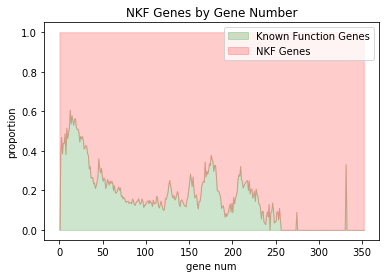

In [17]:
KF_prop = (max_num_genes+1) * [0]
for i in range(len(KF_count)):
    if total_count[i]==0:
        KF_prop[i] = 0
    else:
        KF_prop[i] = KF_count[i]/total_count[i]
    
plt.fill_between(gene_num, [0]*(max_num_genes+1), KF_prop,
                 facecolor="green", # The fill color
                 color='green',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "Known Function Genes")

plt.fill_between(gene_num, KF_prop,  [1]*(max_num_genes+1),
                 facecolor="red", # The fill color
                 color='red',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "NKF Genes")

plt.ylabel("proportion")
plt.xlabel("gene num")
plt.legend()


plt.title("NKF Genes by Gene Number")
plt.show()

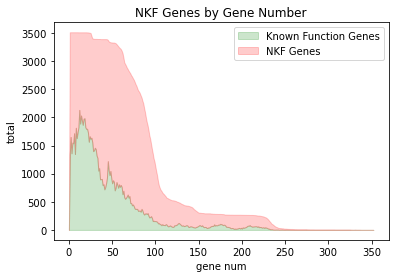

In [18]:
plt.fill_between(gene_num, [0]*(max_num_genes+1), KF_count,
                 facecolor="green", # The fill color
                 color='green',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "Known Function Genes")

plt.fill_between(gene_num, KF_count, total_count,
                 facecolor="red", # The fill color
                 color='red',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "NKF Genes")

plt.ylabel("total")
plt.xlabel("gene num")
plt.legend()


plt.title("NKF Genes by Gene Number")
plt.show()

In [26]:
functions_per_gene_num = [{} for i in range(max_num_genes+1)]

for index, row in df_genes.iterrows():
    n = row["gene number"]
    if row["function"] != "NKF":
        if row["function"] in functions_per_gene_num[n].keys():
            functions_per_gene_num[n][row["function"]] += 1
        else:
            functions_per_gene_num[n][row["function"]] = 1
        

In [29]:
functions_per_gene_num[3]

{'terminase, large subunit': 96,
 'terminase, small subunit': 55,
 'portal protein': 587,
 'minor tail protein': 120,
 'terminase': 128,
 'hnh endonuclease': 80,
 'nucleotidyl transferase': 78,
 'dna primase': 19,
 'portal and muf-like fusion protein': 40,
 '-1': 31,
 'methyltransferase': 1,
 'endonuclease vii': 2,
 'endolysin': 5,
 'dna helicase': 8,
 'capsid maturation protease': 3,
 'dna binding protein': 2,
 'aaa-atpase': 9,
 'toxin in toxin/antitoxin system, hica-like': 1,
 'phosphoribosyl transferase': 1,
 'tail fiber': 3,
 'lsr2-like dna bridging protein': 8,
 'lysin a': 12,
 'adp-ribosyltransferase': 5,
 'ribonucleotide reductase': 1,
 'hydrolase': 7,
 'vip2-like adp-ribosyltransferase toxin': 15,
 'adenylate kinase': 6,
 'parb-like nuclease domain': 5,
 'ro-like rna binding protein': 1,
 'mazg-like nucleotide pyrophosphohydrolase': 2,
 'ribbon-helix-helix dna binding domain': 3,
 'helix-turn-helix dna binding domain': 2,
 'muf-like minor capsid protein': 3,
 'lysin b': 2,
 'ru